## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [3]:
heart.shape

(4238, 16)

In [4]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [5]:
heart.dropna(inplace=True)

Then, we split the data into train and test with 20% of the data in the test subset.

In [6]:
# answer below:
from sklearn.model_selection import train_test_split

X = heart.drop('TenYearCHD', axis=1)
y = heart['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

We will then scale the data using the standard scaler. Do this in the cell below.

In [7]:
# answer below:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

Runtime for the polynomial model was shorter than for the rbf model, but when I ran the models at higher C values the polynomial model was significantly slower than the rbf. Accuracy and overfitting were similar between the models.

In [8]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [43]:
start_time = time.time()
clf = SVC(kernel='poly', C=.1, gamma='auto')
clf.fit(X_train_sc, y_train)

print('Runtime for polynomial: ', time.time() - start_time)

Runtime for polynomial:  0.18542909622192383


In [44]:
start_time = time.time()
rbf = SVC(kernel='rbf', C=.1, gamma='auto')
rbf.fit(X_train_sc, y_train)

print('Runtime for rbf: ', time.time() - start_time)

Runtime for rbf:  0.2793292999267578


In [45]:
y_train_pred = clf.predict(X_train_sc)
y_test_pred = clf.predict(X_test_sc)

print('Training accuracy for polynomial: ', accuracy_score(y_train, y_train_pred))
print('Testing accuracy for polynomial: ', accuracy_score(y_test, y_test_pred))

Training accuracy for polynomial:  0.8608071135430917
Testing accuracy for polynomial:  0.8360655737704918


In [46]:
y_train_pred_rbf = rbf.predict(X_train_sc)
y_test_pred_rbf = rbf.predict(X_test_sc)

print('Training accuracy for rbf: ', accuracy_score(y_train, y_train_pred_rbf))
print('Testing accuracy for rbf: ', accuracy_score(y_test, y_test_pred_rbf))

Training accuracy for rbf:  0.850547195622435
Testing accuracy for rbf:  0.8360655737704918


Which model overfits more? How would you improve the overfitting?

Look at a classification report and confusion matrix. How does the class balance affect your results?

Overfitting was similar between the two models but the rbf model overfit a little more. Adjusting the C value decreased overfitting in both models.

<br>

Class 0 had nearly 6 times as many observations as class 1. As a result, we can see that recall for class 1 was very low in both models. The rbf model never predicted 1 for the test data. 

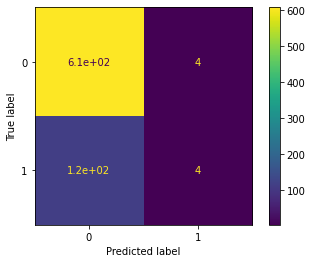

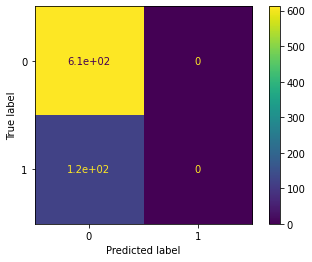

In [47]:
plot_confusion_matrix(clf, X_test_sc, y_test)
plot_confusion_matrix(rbf, X_test_sc, y_test)
plt.show()

In [48]:
print('Classification matrix for polynomial SVC model')
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Classification matrix for polynomial SVC model
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2487
           1       0.94      0.07      0.14       437

    accuracy                           0.86      2924
   macro avg       0.90      0.54      0.53      2924
weighted avg       0.87      0.86      0.81      2924

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       612
           1       0.50      0.03      0.06       120

    accuracy                           0.84       732
   macro avg       0.67      0.51      0.49       732
weighted avg       0.78      0.84      0.77       732



In [36]:
print('Classification matrix for rbf SVC model')
print(classification_report(y_train, y_train_pred_rbf))
print(classification_report(y_test, y_test_pred_rbf))

Classification matrix for rbf SVC model
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2487
           1       1.00      0.08      0.15       437

    accuracy                           0.86      2924
   macro avg       0.93      0.54      0.54      2924
weighted avg       0.88      0.86      0.81      2924

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       612
           1       0.50      0.01      0.02       120

    accuracy                           0.84       732
   macro avg       0.67      0.50      0.46       732
weighted avg       0.78      0.84      0.76       732

